<a href="https://colab.research.google.com/github/Jul-Summer/ML/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6_1_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_MATH%26ML_7_(HW_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_or_not_spam.csv to spam_or_not_spam (2).csv


## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [ ]:
# откройте данные: ваш код здесь
import pandas as pd
data = pd.read_csv('spam_or_not_spam.csv')
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [ ]:
# рассчитайте частоты для классов : ваш код здесь
# Подсчет частот классов
class_counts = data["label"].value_counts(normalize=True)
class_counts

,proportion
label,
0,0.833333
1,0.166667


In [ ]:
# Подсчёт количества спам-сообщений и не спам-сообщений
spam_count = data[data['label'] == 1].shape[0]
not_spam_count = data[data['label'] == 0].shape[0]

# Вывод результатов
print(f"Количество спам-сообщений: {spam_count}")
print(f"Количество не спам-сообщений: {not_spam_count}")


Количество спам-сообщений: 500
Количество не спам-сообщений: 2500


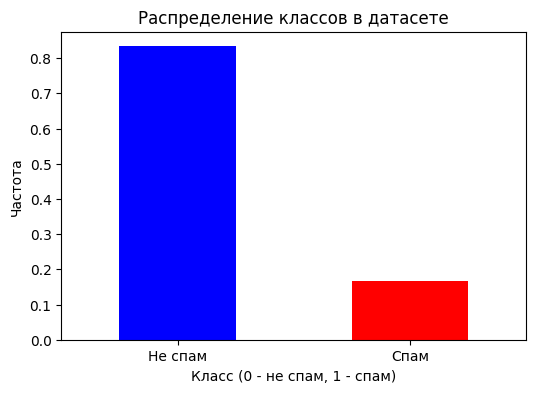

In [ ]:
# визуализируйте результат: ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt
email_data = pd.DataFrame(data)

# Подсчет частот классов
#class_counts = data["label"].value_counts(normalize=True)

# Визуализация
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xlabel("Класс (0 - не спам, 1 - спам)")
plt.ylabel("Частота")
plt.title("Распределение классов в датасете")
plt.xticks(ticks=[0, 1], labels=["Не спам", "Спам"], rotation=0)
plt.show()

# Вывод частот классов
#class_counts

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [ ]:
#ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Переводим данные в векторный вид:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data['email'] = data['email'].replace('', np.nan)
data = data.dropna(how='any', axis=0)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['email'])  # Векторизация текстов
y = data['label']  # Целевая переменная (0 — не спам, 1 — спам)

#feature_names = vectorizer.get_feature_names_out()

# Количество признаков
#num_features = len(feature_names)
#print(f'Количество признаков: {num_features}')


Определите, сколько теперь признаков в нашем наборе данных:

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [ ]:
#ваш код здесь
from sklearn.model_selection import train_test_split

X = vectorizer.fit_transform(data['email'])  # Матрица признаков
y = data['label']  # Целевая переменная

print(f'Размерность матрицы признаков: {X.shape}')  # (количество образцов, количество признаков)



Размерность матрицы признаков: (2999, 34116)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [ ]:
#ваш код здесь
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки с использованием стратифицированного разбиения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, stratify=y)

# Проверим размерности выборок
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(749, 34116) (2250, 34116) (749,) (2250,)


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [ ]:
#ваш код здесь
mean_target_test = round(y_test.mean(), 3)
print(f'Среднее значение целевой переменной по тестовой выборке: {mean_target_test}')


Среднее значение целевой переменной по тестовой выборке: 0.166


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь
from sklearn.naive_bayes import MultinomialNB

# Инициализируем и обучаем модель
model = MultinomialNB(alpha=0.01)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества модели
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Точность модели: {accuracy:.4f}')
print('Отчёт по классификации:\n', report)


Точность модели: 0.9804
Отчёт по классификации:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1876
           1       1.00      0.89      0.94       374

    accuracy                           0.98      2250
   macro avg       0.99      0.94      0.96      2250
weighted avg       0.98      0.98      0.98      2250



Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [ ]:
#ваш код здесь
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision для класса "спам" (label = 1)
precision = precision_score(y_test, y_pred)

# Recall для класса "спам" (label = 1)
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

print(f'Accuracy (доля верных предсказаний): {accuracy:.4f}')
print(f'Precision (точность для спама): {precision:.4f}')
print(f'Recall (полнота для спама): {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy (доля верных предсказаний): 0.9804
Precision (точность для спама): 0.9970
Recall (полнота для спама): 0.8850
F1-score: 0.9377


Нарисуйте ROC-кривую:

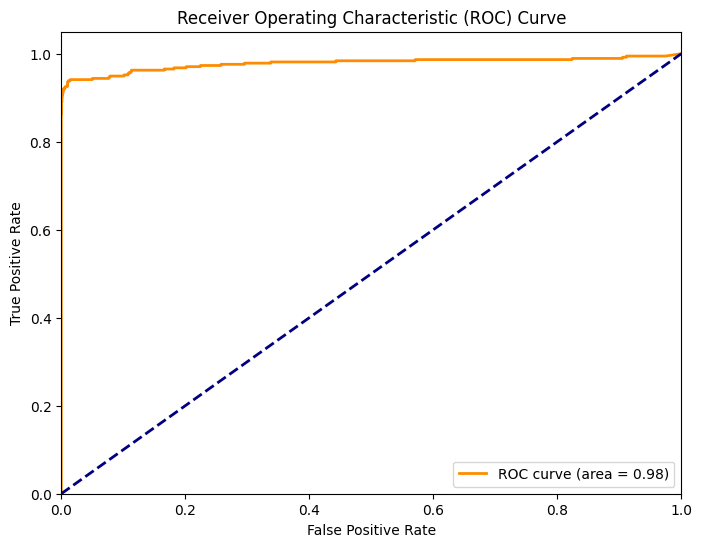

In [ ]:
#ваш код здесь
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получаем вероятности для класса "спам" (класс 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Вычисляем AUC (площадь под кривой)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Список значений alpha для перебора
alpha_values = [0.001, 0.01, 0.1, 1, 10]

# Инициализация модели Multinomial Naïve Bayes
model = MultinomialNB()

# Настройка GridSearchCV для перебора значений alpha с использованием 5-кратной кросс-валидации
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)

# Лучшие параметры и результаты
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Оценка на тестовой выборке с лучшим значением alpha
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Вычисление точности на тестовой выборке
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Лучшее значение alpha: {best_alpha}")
print(f"Лучший результат кросс-валидации (точность): {best_score:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

# Печать отчета по классификации
from sklearn.metrics import classification_report
print("Отчёт по классификации:\n", classification_report(y_test, y_pred))


Лучшее значение alpha: 0.1
Лучший результат кросс-валидации (точность): 0.9853
Точность на тестовой выборке: 0.9858
Отчёт по классификации:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1876
           1       0.99      0.92      0.96       374

    accuracy                           0.99      2250
   macro avg       0.99      0.96      0.97      2250
weighted avg       0.99      0.99      0.99      2250



**Вывод**
- Лучшее значение alpha: 0.1 – Это значение параметра регуляризации (alpha), который помогает контролировать степень штрафа за сложность модели. Чем меньше alpha, тем меньше регуляризация, что может привести к переобучению, если модель слишком сложна. Здесь значение alpha=0.1 показало оптимальные результаты.

- Лучший результат кросс-валидации (точность): 0.9853 – Во время кросс-валидации модель достигла точности 98.53%, что говорит о хорошем обобщении на различных подмножествах данных.

- Точность на тестовой выборке: 0.9858 – Точность на тестовой выборке еще выше, что подтверждает, что модель хорошо обобщает на новые данные и не переобучена.